In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
from collections import Counter
from nltk import PorterStemmer
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [8]:
train = pd.read_csv('kaggle/train.csv')
train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
test = pd.read_csv('kaggle/test.csv')
test.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Text(0.5, 1.0, 'Dataset labels distribuition')

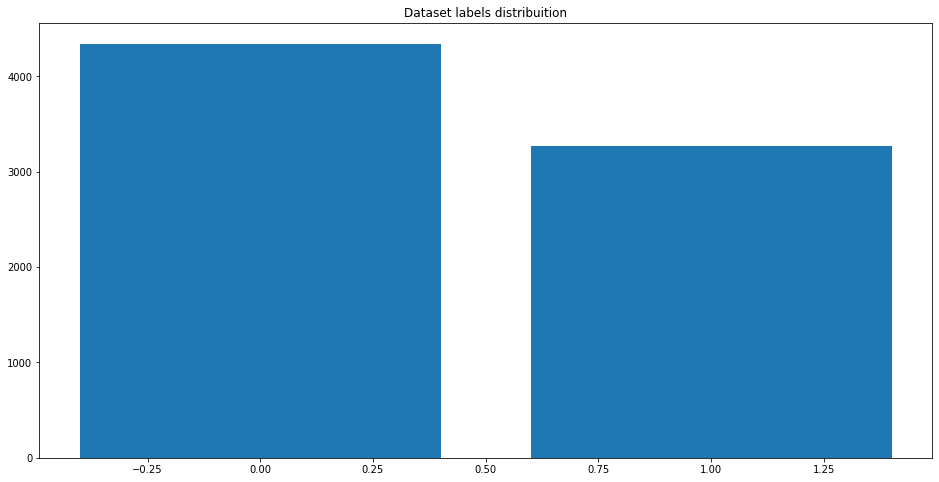

In [10]:
target_cnt = Counter(train.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

**Pre-Processing**

In [11]:
#Remove Hashtags
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text


#TRAINING DATA


#Removing Twitter Handles
train['Tidy_Tweets'] = np.vectorize(remove_pattern)(train['text'], "@[\w]*")
#Removing Punctuations, Numbers, and Special Characters
train['Tidy_Tweets'] = train['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")
#Removing Short Words
train['Tidy_Tweets'] = train['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
train.head(5)




#TESTING DATA


#Removing Twitter Handles
test['Tidy_Tweets'] = np.vectorize(remove_pattern)(test['text'], "@[\w]*")
#Removing Punctuations, Numbers, and Special Characters
test['Tidy_Tweets'] = test['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")
#Removing Short Words
test['Tidy_Tweets'] = test['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
test.head(5)

,id,keyword,location,text,Tidy_Tweets
0,0,NaN,NaN,Just happened a terrible car crash,Just happened terrible crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",Heard about #earthquake different cities stay ...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there forest fire spot pond geese fleeing acro...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills China Taiwan


In [12]:
#Tokenize and Stem Tweets


#TRAINING DATA

tokenized_tweet = train['Tidy_Tweets'].apply(lambda x: x.split())
ps = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

train['Tidy_Tweets'] = tokenized_tweet
train.head()



#TESTING DATA

tokenized_tweet = test['Tidy_Tweets'].apply(lambda x: x.split())
ps = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

test['Tidy_Tweets'] = tokenized_tweet
#test['target'] = pd.Series()
test.head()

,id,keyword,location,text,Tidy_Tweets
0,0,NaN,NaN,Just happened a terrible car crash,just happen terribl crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard about #earthquak differ citi stay safe e...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there forest fire spot pond gees flee across s...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalyps light #spokan #wildfir
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan


In [13]:
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags


#TRAINING DATA

ht_ndisaster = Hashtags_Extract(train['Tidy_Tweets'][train['target']==0])
ht_ndisaster_unnest = sum(ht_ndisaster,[])

ht_disaster = Hashtags_Extract(train['Tidy_Tweets'][train['target']==1])
ht_disaster_unnest = sum(ht_disaster,[])



#TESTING DATA

test_ndisaster = Hashtags_Extract(test['Tidy_Tweets'])
test_ndisaster_unnest = sum(test_ndisaster,[])

test_disaster = Hashtags_Extract(test['Tidy_Tweets'])
test_disaster_unnest = sum(test_disaster,[])

In [14]:
#Counting the frequency of the words having disaster

word_freq_disaster = nltk.FreqDist(ht_disaster_unnest)
df_disaster = pd.DataFrame({'Hashtags':list(word_freq_disaster.keys()),'Count':list(word_freq_disaster.values())})
df_disaster.head(10)

,Hashtags,Count
0,earthquak,19
1,wildfir,13
2,alaska,1
3,rockyfir,4
4,cafir,2
5,flood,10
6,disast,8
7,rain,2
8,florida,2
9,tampabay,1


In [15]:
#Counting the frequency of the words having disaster

word_freq_disaster = nltk.FreqDist(test_disaster_unnest)
df_disaster = pd.DataFrame({'Hashtags':list(word_freq_disaster.keys()),'Count':list(word_freq_disaster.values())})
df_disaster.head(10)

,Hashtags,Count
0,earthquak,7
1,spokan,1
2,wildfir,5
3,previouslyondoyintv,1
4,nsfw,2
5,nowplay,4
6,pulsradio,1
7,paturnpik,1
8,traffic,1
9,curs,1


# **Feature Engineering**

In [16]:
#Bag-of-Words Features

from sklearn.feature_extraction.text import CountVectorizer

#TRAIN
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(train['Tidy_Tweets'])
df_bow = pd.DataFrame(bow.todense())
train_bow = bow
train_bow.todense()

#TEST
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(test['Tidy_Tweets'])
df_bow = pd.DataFrame(bow.todense())
test_bow = bow
test_bow.todense()




#TF-IDF Features
from sklearn.feature_extraction.text import TfidfVectorizer

#TRAIN
tfidf = TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
tfidf_matrix=tfidf.fit_transform(train['Tidy_Tweets'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense())
train_tfidf_matrix = tfidf_matrix
train_tfidf_matrix.todense()

#TEST
tfidf = TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
tfidf_matrix=tfidf.fit_transform(test['Tidy_Tweets'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense())
test_tfidf_matrix = tfidf_matrix
test_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
#Split Dataset 

from sklearn.model_selection import train_test_split

#Bag-of-Words Features
x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,train['target'],test_size=0.3,random_state=42)
xvalid_bow = test_bow

#TF-IDF features
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(train_tfidf_matrix,train['target'],test_size=0.3,random_state=17)
xvalid_tfidf = test_tfidf_matrix

# Machine Learning Models Training

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score



#LOGISTIC REGRESSION BOW
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')
Log_Reg.fit(x_train_bow,y_train_bow)
prediction_proba_bow = Log_Reg.predict_proba(x_valid_bow)
prediction_bow = Log_Reg.predict(x_valid_bow)
prediction_int = prediction_proba_bow[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)
prediction_bow = Log_Reg.predict(x_valid_bow)
# calculating f1 score and ccuracy
log_bow_f1 = f1_score(y_valid_bow, prediction_int)
#print('Logistic Regression BOW F1 Score: ', log_bow_f1)
log_bow_acc = accuracy_score(y_valid_bow, prediction_bow)
print('Logistic Regression BOW accuracy: ', log_bow_acc)



#LOGISTIC REGRESSION TF-IDF
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')
Log_Reg.fit(x_train_tfidf,y_train_tfidf)
prediction_proba_tfidf = Log_Reg.predict_proba(x_valid_tfidf)
prediction_int = prediction_proba_tfidf[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)
prediction_tfidf = Log_Reg.predict(x_valid_tfidf)
# calculating f1 score and accuracy
log_tfidf_f1 = f1_score(y_valid_tfidf, prediction_int)
#print('Logistic Regression TF-IDF F1 Score: ', log_tfidf_f1)
log_tfidf_acc = accuracy_score(y_valid_tfidf, prediction_tfidf)
print('Logistic Regression TF-IDF accuracy: ', log_tfidf_acc)



test_pred = Log_Reg.predict_proba(xvalid_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('results.csv', index=False) # writing data to a CSV file





print('-------------------------------------------------------')


#XGBOOST BOW
xgb_bow = XGBClassifier(random_state=22,learning_rate=0.9)
xgb_bow.fit(x_train_bow, y_train_bow)
#calculating f1 score and accuracy
prediction_proba_xgb = xgb_bow.predict_proba(x_valid_bow)
xgb_int = prediction_proba_xgb[:,1]>=0.3
xgb_int = xgb_int.astype(np.int)
prediction_bow = xgb_bow.predict(x_valid_bow)
# calculating f1 score and accuracy
xgb_bow_f1 = f1_score(y_valid_bow,xgb_int)
#print('XGBOOST BOW F1 Score: ', xgb_bow_f1)
xgb_bow_acc = accuracy_score(y_valid_bow, prediction_bow)
print('XGBOOST BOW accuracy: ', xgb_bow_acc)


#XGBOOST TF-IDF
xgb_tfidf = XGBClassifier(random_state=29,learning_rate=0.7)
xgb_tfidf.fit(x_train_tfidf, y_train_tfidf)
#calculating f1 score and accuracy
prediction_proba_xgb = xgb_tfidf.predict_proba(x_valid_tfidf)
xgb_int_tfidf = prediction_proba_xgb[:,1]>=0.3
xgb_int_tfidf = xgb_int_tfidf.astype(np.int)
prediction_xgb = xgb_tfidf.predict(x_valid_tfidf)
xgb_tfidf_f1 = f1_score(y_valid_tfidf,xgb_int_tfidf)
#print('XGBOOST TF-IDF F1 Score: ', xgb_tfidf_f1)
xgb_tfidf_acc = accuracy_score(y_valid_tfidf, prediction_xgb)
print('XGBOOST TF-IDF accuracy: ', xgb_tfidf_acc)


print('-------------------------------------------------------')


#DECISION TREE BOW
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)
dct.fit(x_train_bow,y_train_bow)
#calculating f1 score and accuracy
prediction_proba_dct = dct.predict_proba(x_valid_bow)
dct_int_bow = prediction_proba_dct[:,1]>=0.3
dct_int_bow = dct_int_bow.astype(np.int)
prediction_dct = dct.predict(x_valid_bow)
dct_bow_f1 = f1_score(y_valid_bow,dct_int_bow)
#print('DECISION TREE BOW F1 Score: ', dct_bow_f1)
dct_bow_acc = accuracy_score(y_valid_bow, prediction_dct)
print('DECISION TREE BOW accuracy: ', dct_bow_acc)


#DECISION TREE TF-IDF
dct.fit(x_train_tfidf,y_train_tfidf)
dct_tfidf = dct.predict_proba(x_valid_tfidf)
dct_tfidf = dct_tfidf[:,1]>=0.3
dct_int_tfidf = dct_tfidf.astype(np.int)
prediction_dct = dct.predict(x_valid_tfidf)
dct_tfidf_f1 = f1_score(y_valid_tfidf,dct_int_tfidf)
#print('DECISION TREE TF-IDF F1 Score: ', dct_tfidf_f1)
dct_tfidf_acc = accuracy_score(y_valid_tfidf, prediction_dct)
print('DECISION TREE TF-IDF accuracy: ', dct_tfidf_acc)



print('-------------------------------------------------------')

#ADABOOST BOW
adb = AdaBoostClassifier(n_estimators=800, random_state = 1)
adb.fit(x_train_bow,y_train_bow)
#calculating f1 score and accuracy
prediction_proba_adb = adb.predict_proba(x_valid_bow)
adb_int_bow = prediction_proba_adb[:,1]>=0.3
adb_int_bow = adb_int_bow.astype(np.int)
prediction_adb_bow = adb.predict(x_valid_bow)
adb_bow_f1 = f1_score(y_valid_bow,adb_int_bow)
#print('ADABOOST BOW F1 Score: ', adb_bow_f1)
adb_bow_acc = accuracy_score(y_valid_bow, prediction_adb_bow)
print('ADABOOST BOW accuracy: ', adb_bow_acc)

#ADABOOST TF-IDF
adb.fit(x_train_tfidf,y_train_tfidf)
#calculating f1 score and accuracy
prediction_proba_adb = adb.predict_proba(x_valid_tfidf)
adb_int_tfidf = prediction_proba_adb[:,1]>=0.3
adb_int_tfidf = adb_int_tfidf.astype(np.int)
prediction_adb_tfidf = adb.predict(x_valid_tfidf)
adb_tfidf_f1 = f1_score(y_valid_tfidf,adb_int_tfidf)
#print('ADABOOST TF-IDF F1 Score: ', adb_tfidf_f1)
adb_tfidf_acc = accuracy_score(y_valid_tfidf, prediction_adb_tfidf)
print('ADABOOST TF-IDF accuracy: ', adb_tfidf_acc)


print('-------------------------------------------------------')

#NAIVEBAYES BOW
nb = MultinomialNB()
nb.fit(x_train_bow,y_train_bow)
#calculating f1 score and accuracy
prediction_proba_nb = nb.predict_proba(x_valid_bow)
nb_int_bow = prediction_proba_nb[:,1]>=0.3
nb_int_bow = nb_int_bow.astype(np.int)
prediction_nb_bow = nb.predict(x_valid_bow)
nb_bow_f1 = f1_score(y_valid_bow,nb_int_bow)
#print('NAIVE BAYES F1 Score: ', adb_bow_f1)
nb_bow_acc = accuracy_score(y_valid_bow, prediction_nb_bow)
print('NAIVE BAYES BOW accuracy: ', nb_bow_acc)

#NAIVEBAYES TF-IDF
nb.fit(x_train_tfidf,y_train_tfidf)
#calculating f1 score and accuracy
prediction_proba_nb = nb.predict_proba(x_valid_tfidf)
nb_int_tfidf = prediction_proba_nb[:,1]>=0.3
nb_int_tfidf = nb_int_tfidf.astype(np.int)
prediction_nb_tfidf = nb.predict(x_valid_tfidf)
nb_tfidf_f1 = f1_score(y_valid_tfidf,nb_int_tfidf)
#print('NAIVEBAYES TF-IDF F1 Score: ', nb_tfidf_f1)
nb_tfidf_acc = accuracy_score(y_valid_tfidf, prediction_nb_tfidf)
print('NAIVEBAYES TF-IDF accuracy: ', nb_tfidf_acc)

Logistic Regression BOW accuracy:  0.7898423817863398
Logistic Regression TF-IDF accuracy:  0.7863397548161121
-------------------------------------------------------
XGBOOST BOW accuracy:  0.7863397548161121
XGBOOST TF-IDF accuracy:  0.7732049036777583
-------------------------------------------------------
DECISION TREE BOW accuracy:  0.7359894921190894
DECISION TREE TF-IDF accuracy:  0.728108581436077
-------------------------------------------------------
ADABOOST BOW accuracy:  0.7688266199649737
ADABOOST TF-IDF accuracy:  0.7421190893169878
-------------------------------------------------------
NAIVE BAYES BOW accuracy:  0.7854640980735552
NAIVEBAYES TF-IDF accuracy:  0.7894045534150613


# Machine Learning Models Evaluation

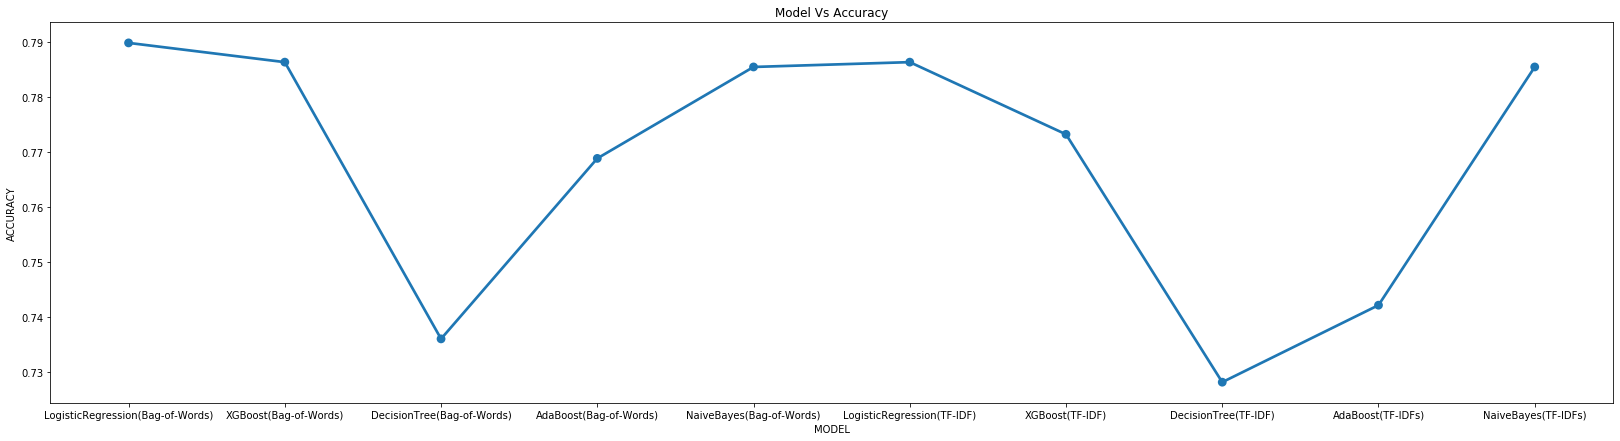

In [30]:
Algo=['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)','AdaBoost(Bag-of-Words)','NaiveBayes(Bag-of-Words)',
     'LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)','AdaBoost(TF-IDFs)','NaiveBayes(TF-IDFs)']

acc = [log_bow_acc, xgb_bow_acc, dct_bow_acc, adb_bow_acc,nb_bow_acc,
        log_tfidf_acc, xgb_tfidf_acc, dct_tfidf_acc, adb_tfidf_acc, nb_bow_acc]

compare = pd.DataFrame({'Model':Algo,'Accuracy':acc})

plt.figure(figsize=(28,7))

sns.pointplot(x='Model',y='Accuracy',data=compare)

plt.title('Model Vs Accuracy')
plt.xlabel('MODEL')
plt.ylabel('ACCURACY')

plt.show()